In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from tqdm import tqdm_notebook as tqdm

In [2]:
def phi(x):
    return 1.*(x>=0.)
    #return (np.tanh(2.*x)+1.)/2.

In [96]:
T = 50000
tau = 150.
tau_s = 10.

N = 500
avg_conn_n = 50
cf = avg_conn_n/N

W = np.random.normal(0.,.2/(cf*N)**.5,(N,N))*(np.random.rand(N,N) <= cf)
W[range(N),range(N)] = 0.

x = np.zeros((T,N))
x[0,:] = np.random.rand(N) - .5
s = np.zeros((T,N))

x_t = np.zeros((T,N))
x_t[0,:] = x[0,:]+(np.random.rand(N)-.5)*2.*10e-3
s_t = np.zeros((T,N))

I = 10e-4

In [97]:
for t in tqdm(range(1,T)):
    y = phi(x[t-1,:])
    x[t,:] = x[t-1,:]*(1.-1./tau) + (1./tau)*(I + s[t-1,:]) - y
    s[t,:] = s[t-1,:]*(1.-1./tau_s) + W @ y
    
    y_t = phi(x_t[t-1,:])
    x_t[t,:] = x_t[t-1,:]*(1.-1./tau) + (1./tau)*(I + s_t[t-1,:]) - y_t
    s_t[t,:] = s_t[t-1,:]*(1.-1./tau_s) + W @ y_t

y = phi(x)
y_t = phi(x_t)

In [98]:
spikes = []
spikes_t = []
for k in range(N):
    spikes.append(np.where(y[:,k]==1.)[0])
    spikes_t.append(np.where(y_t[:,k]==1.)[0])

<IPython.core.display.Javascript object>


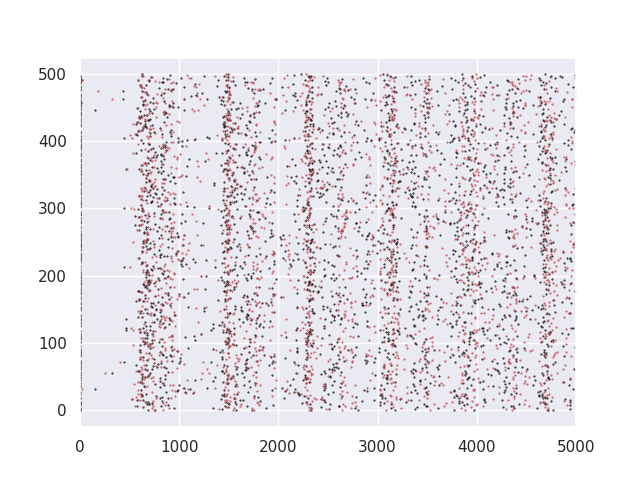

In [99]:
plt.figure()
for k in range(N):
    plt.plot(spikes[k],[k]*spikes[k].shape[0],'.',c='k',markersize=1)
    plt.plot(spikes_t[k],[k]*spikes_t[k].shape[0],'.',c='r',markersize=1)

plt.xlim([0,5000])
plt.show()

<IPython.core.display.Javascript object>


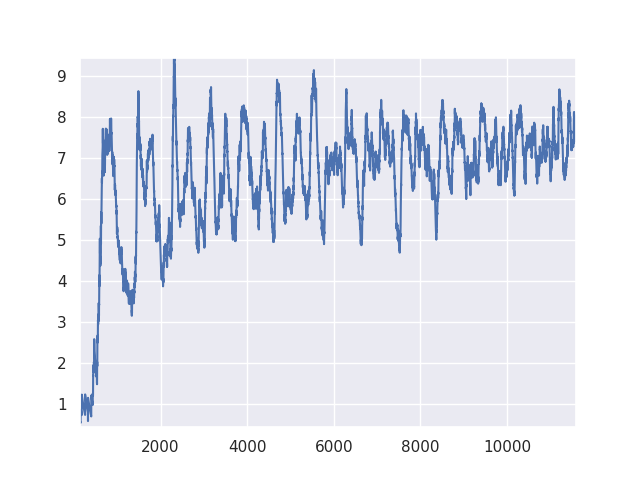

In [101]:
plt.figure()
plt.plot(np.linalg.norm(x-x_t,axis=1))
plt.show()

<IPython.core.display.Javascript object>


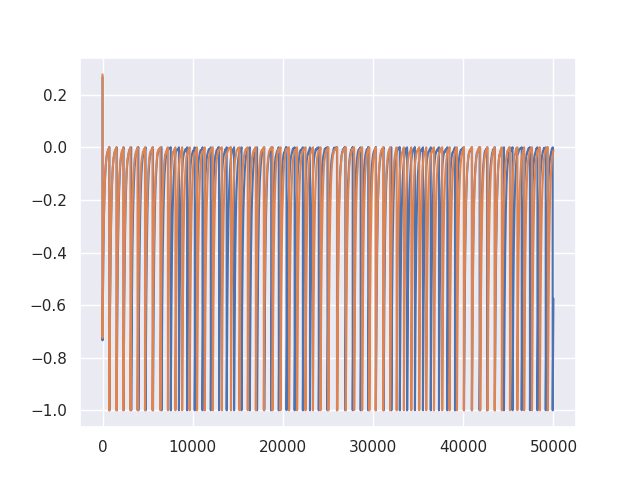

In [102]:
plt.figure()
plt.plot(x[:,0])
plt.plot(x_t[:,0])
plt.show()